# Instalación de Qiskit

* Una vez activado el entorno es necesario instalar los paquetes de Qiskit. Para ello teclearemos la instrucción:

`pip install qiskit`

* Aunque si tenemos la intención de utilizar la funcionalidad de visualización o los cuadernos Jupyter se recomienda instalar qiskit con los requisitos adicionales de visualización.

`pip install qiskit[visualization]`

## Comprobación de la instalación.

* Para comprobar que la instalación está correcta importaremos el paquete `qiskit` y comprobaremos qué versión está instalada.

In [1]:
import qiskit

In [2]:
# Con este comando obtendremos la versión del paquete qiskit-terra
qiskit.__version__

'0.23.2'

## Flujo de trabajo con Qiskit

* El flujo de trabajo del uso de Qiskit consiste en tres pasos de alto nivel:
  - **Construir**: diseñar un circuito cuántico que represente el problema que estamos considerando.
  - **Ejecutar**: ejecutar experimentos en diferentes backends (que incluyen tanto sistemas reales como simuladores).
  - **Analizar**: calcular las estadísticas de resumen y visualizar los resultados de los experimentos.
* A continuación veremos como seguir estos pasos de forma detallada en un ejemplo concreto.  

# Construir un circuito cuántico

## Importar paquetes

* Para trabajar con Qiskit necesitamos importar ciertos paquetes según las necesidades que tengamos en nuestro programa. 

In [4]:
import numpy as np
from qiskit import(QuantumCircuit, execute, Aer)
from qiskit.visualization import plot_histogram

## Crear un circuito

* La clase que representa circuitos cuánticos es `QuantumCircuit`.
* Hay que indicarle el número de qubits del circuito y el número de bits clásicos que serán los resultados de las medidas del circuito.  

In [5]:
# A QuantumCircuit with 2 qubits and 2 classical bits
circuit = QuantumCircuit(2, 2)

## Añadir puertas

* Los circuitos se componen de puertas que manejan los qubits, por lo que diseñar un circuito consiste en añadir puertas al mismo.
* Vamos a diseñar un circuito denominado *Estado de Bell* que usa una puerta de Hadamard (H) y una puerta *controlled-not* (CX).
* Al final del circuito medimos los qubits en sus correspondientes bits clásicos.

In [6]:
# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Save the state vector before the measure
circuit.save_statevector()

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

## Visualizar el circuito

* Es importante visualizar el circuito para comprobar si lo hemos construido adecuadamente.
* Esto lo hacemos a través de la función `draw` de `QuantumCircuit`.
* El parámetro `output` nos permite indicar qué tipo de gráfico de salida queremos obtener, `'mpl'` corresponde a la librería *matplotlib* de Python.

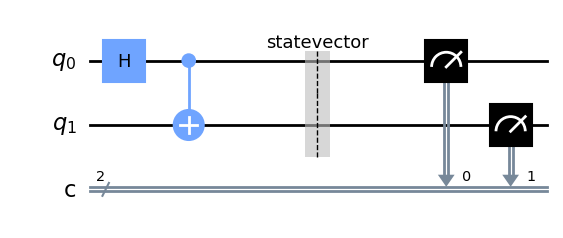

In [7]:
circuit.draw(output='mpl')

# Ejecutar un circuito en el simulador

## Backends

* Qiskit Aer es un *framework* simulador de alto rendimiento para circuitos cuánticos. 
* Proporciona diversos *backends* para lograr diferentes objetivos de simulación.
* Algunos se mantienen por compatibilidad hacia atrás y el principal que usaremos es `aer_simulator`.

In [8]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('aer_simulator')

## Ejecución del circuito

* Una vez obtenido el simulador usamos el método `execute` para ejecutar nuestro circuito en el mismo.
* El número de veces que se ejecuta el circuito puede especificarse mediante el argumento `shots` del método `execute`. En este caso el número de disparos de la simulación se estableció en 1000 (el valor por defecto es 1024). 

In [9]:
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

* Como resultado de la ejecución obtenemos el objeto `job`. 
* A través de este objeto podemos acceder a los resultados de la ejecución a través del método `result()` que nos devuelve un objeto de tipo `Result`.

In [10]:
# Grab results from the job
result = job.result()

* Una vez que se tiene un objeto de resultado, se puede acceder a los recuentos a través del método `get_counts(circuit)`
* `getCounts` te devuelve el histograma resultado del experimento expresado como un diccionario.

In [11]:
# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 517, '11': 483}


# Analizar los resultados de la ejecución

## Resultados de la medición

* Finalmente podemos visualizar los resultados de una forma más gráfica con los distintos visualizadores que tiene Qiskit.
* En esta caso la visualización más adecuada el `plot_histogram()` a la cual le pasamos el diccionario `counts`. 

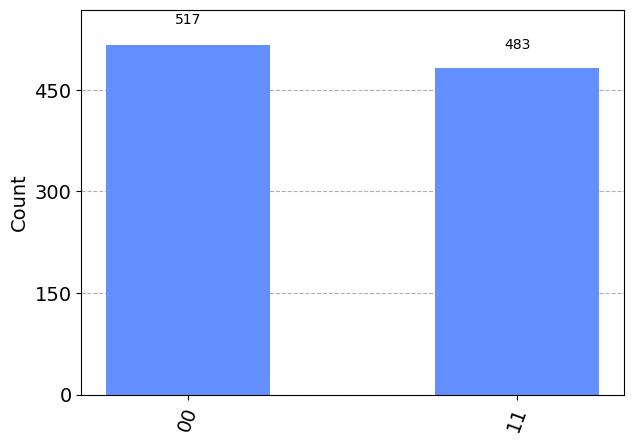

In [12]:
plot_histogram(counts)

## Estado cuántico (state vector)

* Como hemos grabado el estado cuántico antes de realizar las medidas podemos acceder a este estado mendiante el método `get_statevector`.
* Nota: esto solo es posible en un simulador, en un ordenador cuántico real solo podremos acceder a las medidas del mismo.

In [13]:
state = result.get_statevector(circuit)
print(state)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


* Podemos obtener las probabilidades de cada estado usando `Statevector`
* Si tenemos muchos qubits es probable que no podamos hacer estos cálculos porque la complejidad exponencial haría que nos quedáramos sin memoria.

In [15]:
from qiskit.quantum_info import Statevector
probs = Statevector(state).probabilities_dict()
print(probs)

{'00': 0.5000000000000001, '11': 0.5000000000000001}


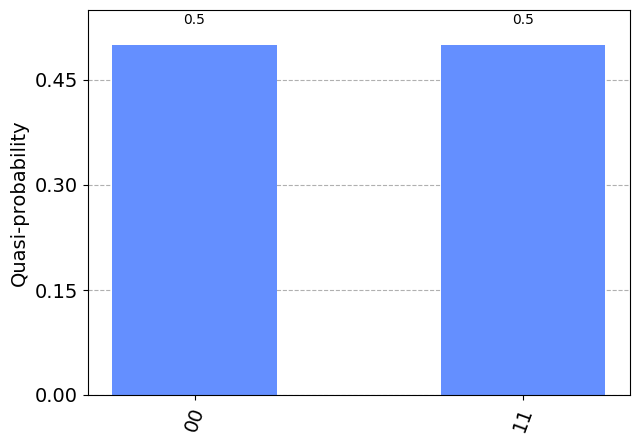

In [16]:
plot_histogram(probs)

# Ejecutar el circuito en el ordenador cuántico de IBM


URL: https://quantum-computing.ibm.com/

<div>
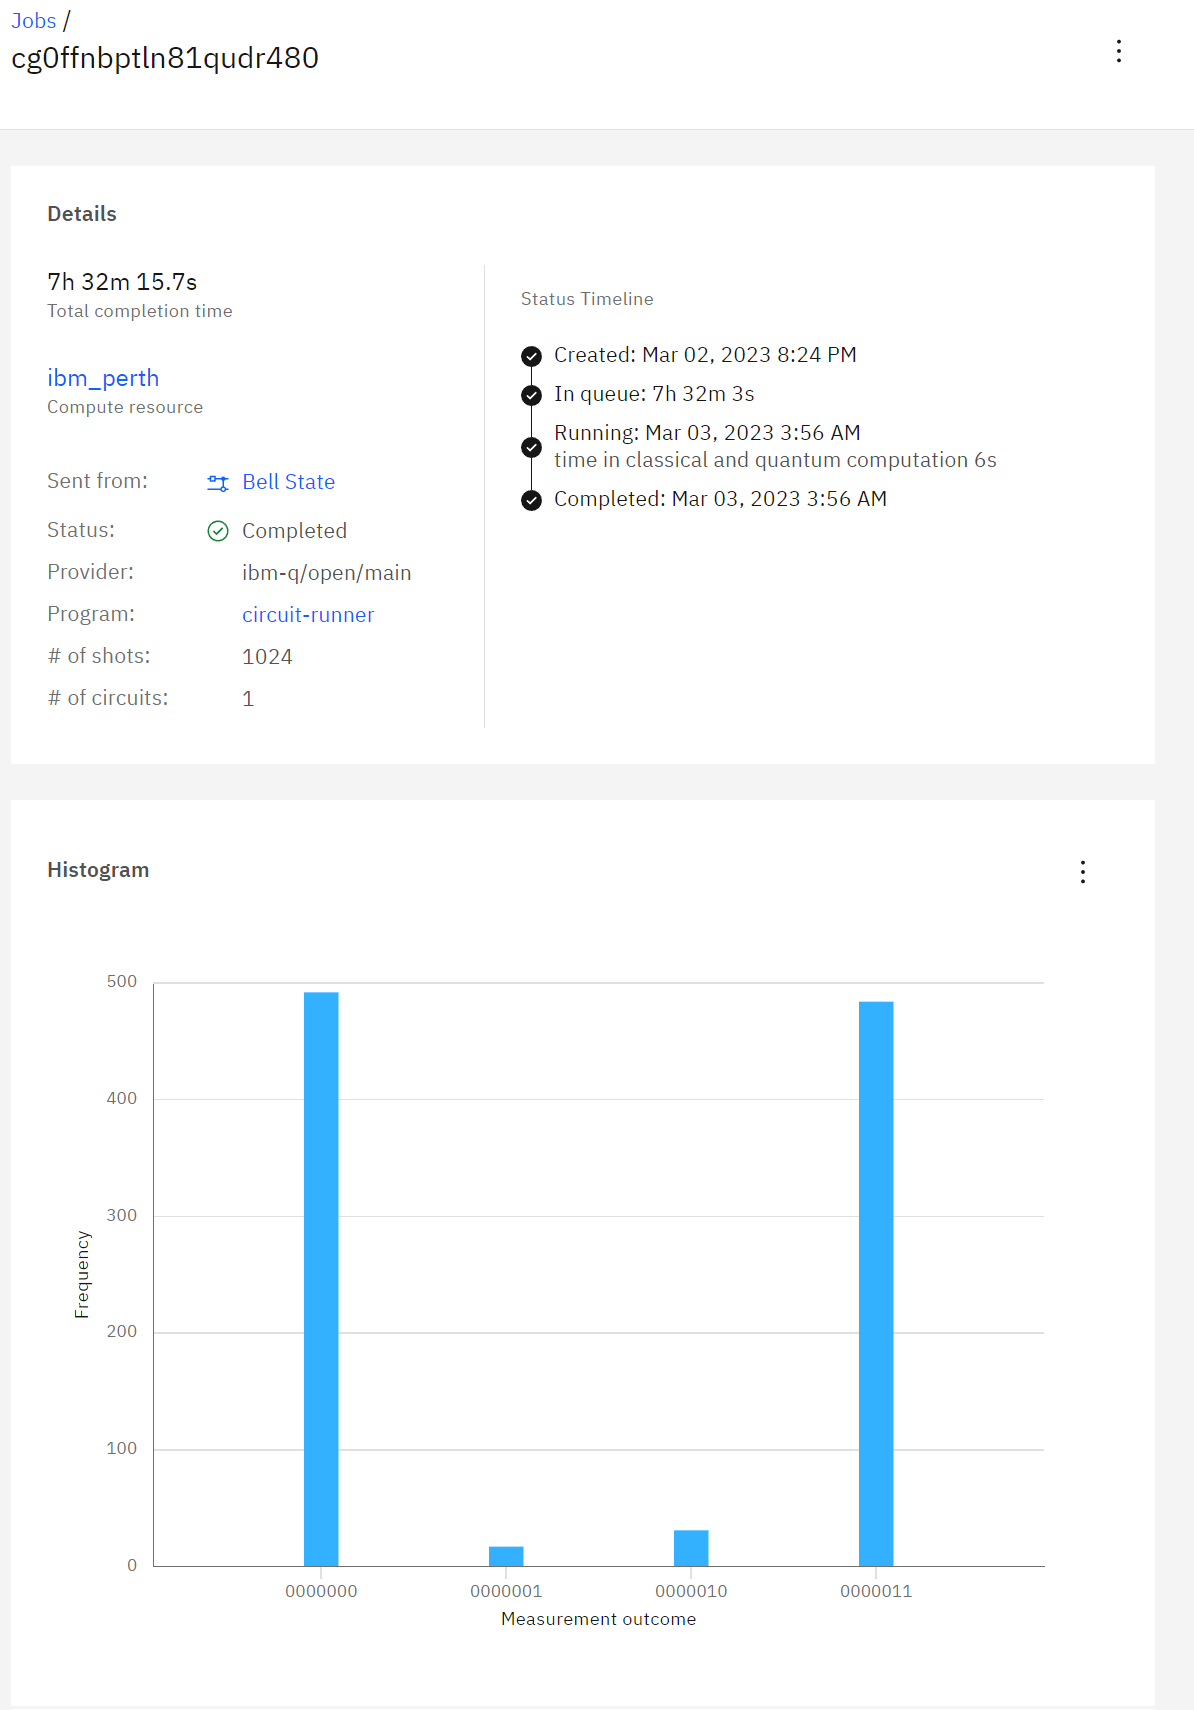
</div>

<div>
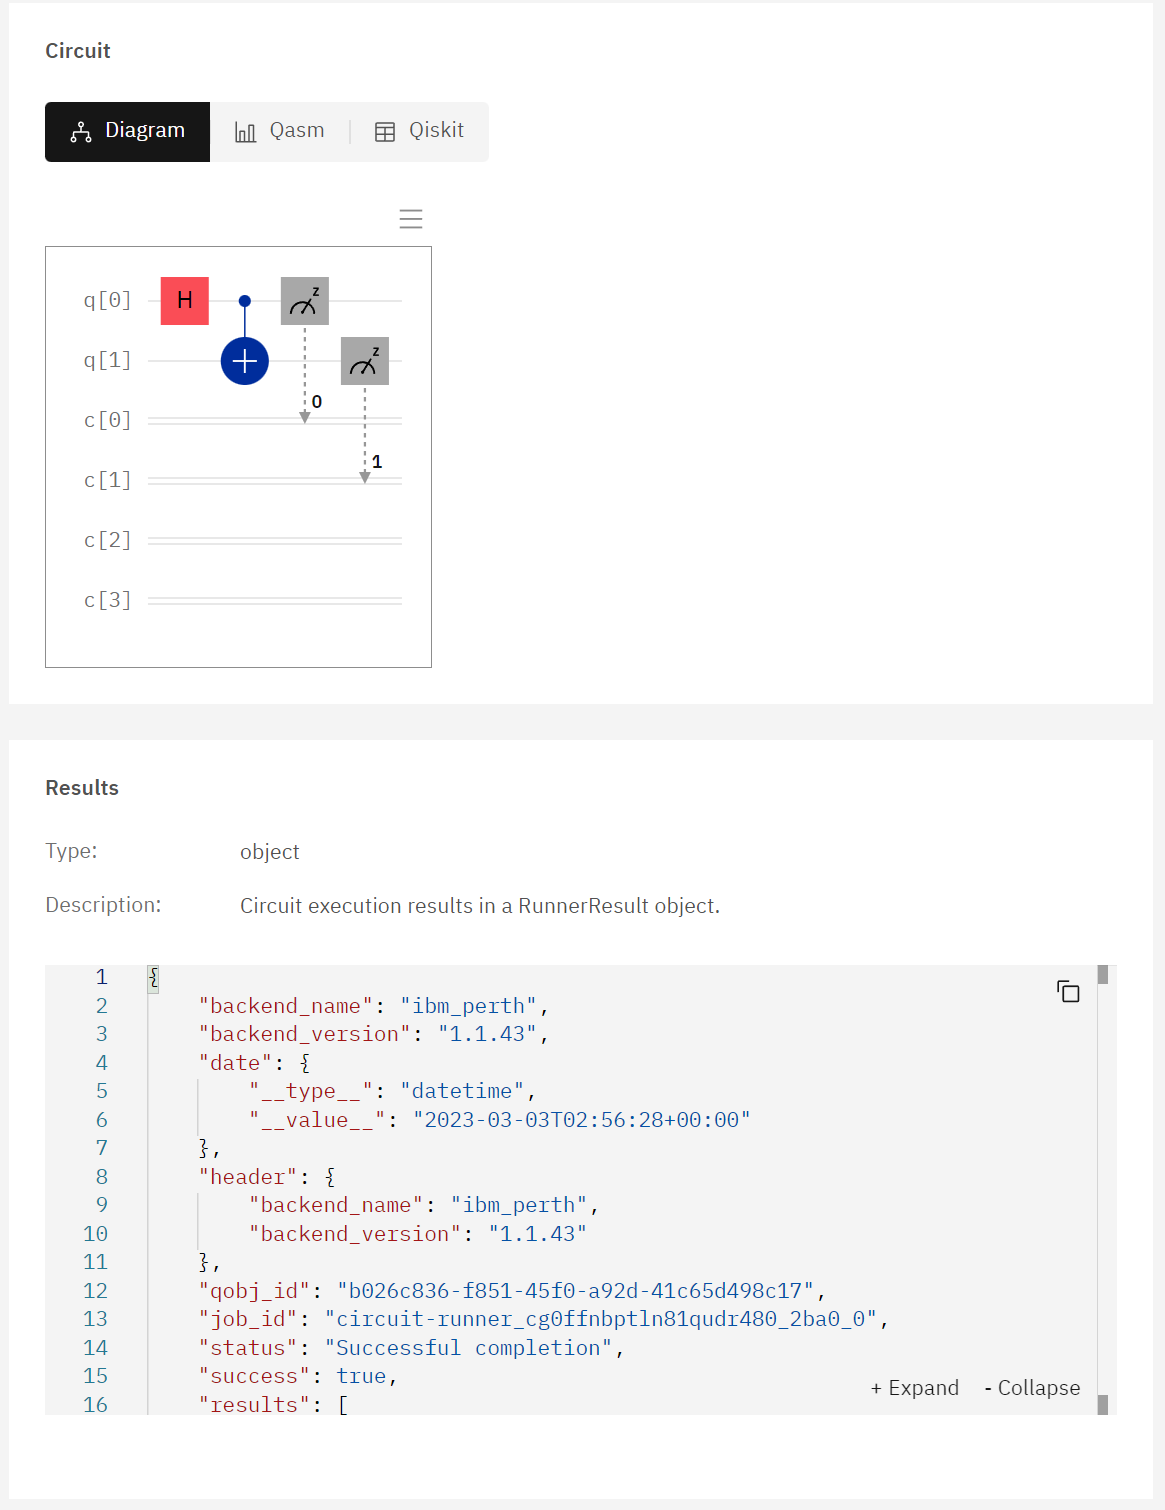
</div>

# Algoritmo cuántico de Grover

## Búsqueda clásica

In [17]:
my_list = [1, 3, 5, 2, 4, 9, 5, 8, 7, 6]

In [18]:
# where is 7
# we will use oracles...

def the_oracle(my_input):
    winner = 7;
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [19]:
# Cuantas veces hay que llamar al oráculo para encontrar el número

def search():
    for index, trial_number in enumerate(my_list):
        if the_oracle(trial_number) is True:
            print(f'Winner found at index {index}')
            print(f'{index+1} calls to the Oracle used')
            break

In [20]:
search()

Winner found at index 8
9 calls to the Oracle used


In [21]:
import random

for i in range(5):
    random.shuffle(my_list)
    search()

Winner found at index 4
5 calls to the Oracle used
Winner found at index 9
10 calls to the Oracle used
Winner found at index 8
9 calls to the Oracle used
Winner found at index 6
7 calls to the Oracle used
Winner found at index 8
9 calls to the Oracle used


Complejidad clásica = $O(N)$

## Búsqueda cuántica

* Nos planteamos el problema de buscar el estado cuántico $|11\rangle$ entre los cuatro posibles valores existentes para dos bits: $|00\rangle$, $|01\rangle$, $|10\rangle$ y $|11\rangle$, 

### Oráculo cuántico

__Puerta Controlled-Z__

$|11\rangle \rightarrow [CZ] \rightarrow -|11\rangle$

In [22]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

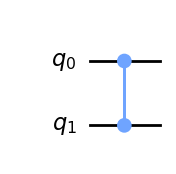

In [23]:
# Definimos el circuito del oráculo
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0, 1)
oracle.to_gate()
oracle.draw(output='mpl')

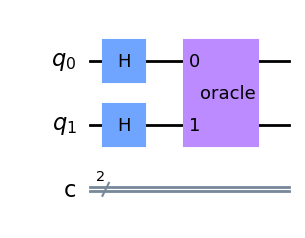

In [24]:
# Probamos a ver si el oráculo funciona
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.draw(output='mpl')

<div>
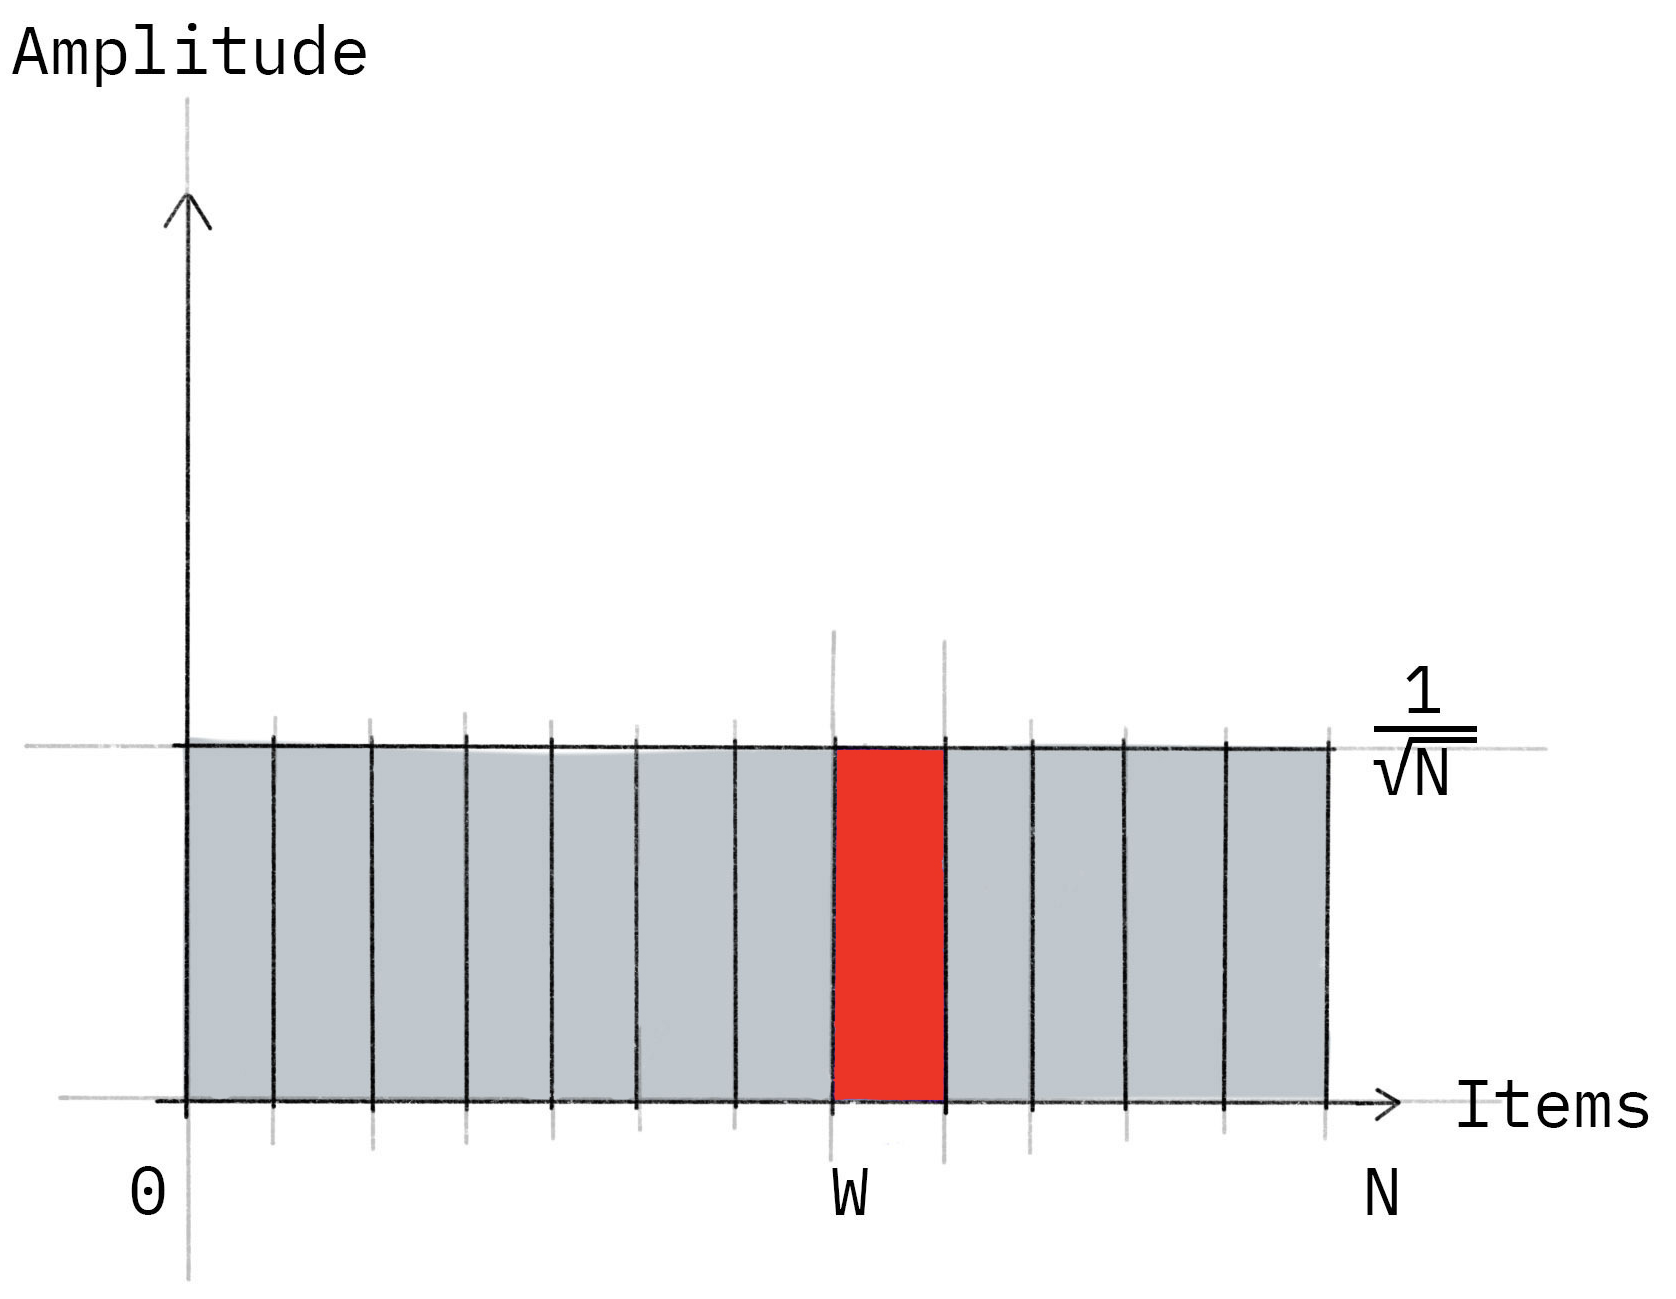
</div>

In [25]:
job = execute(grover_circ, backend)
result = job.result()

In [26]:
sv = result.get_statevector()
np.around(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

<div>
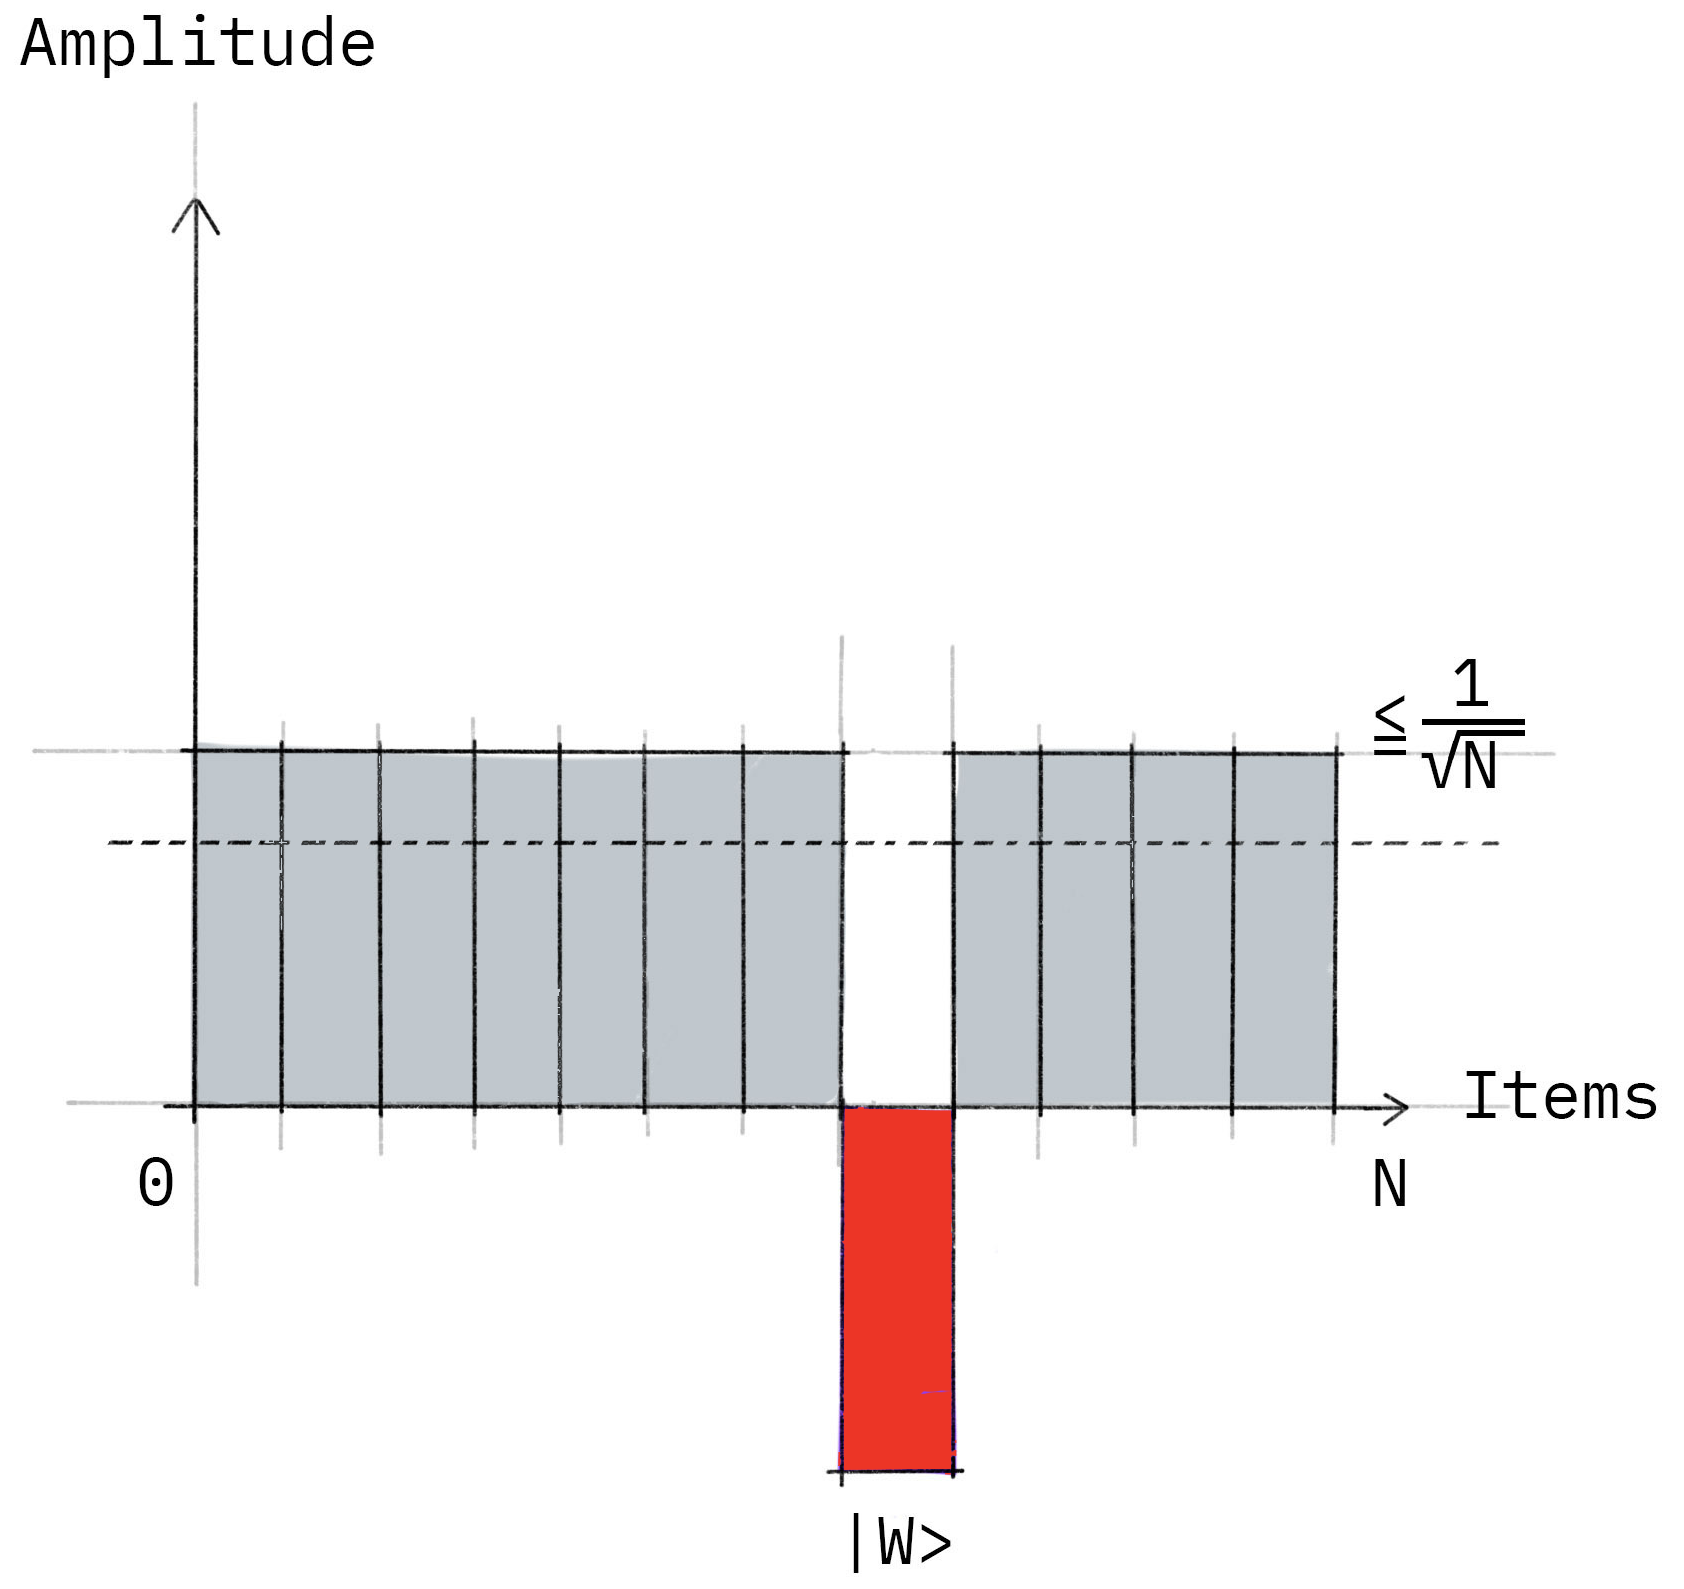
</div>

{'00': 0.2500000000000001, '01': 0.2500000000000001, '10': 0.2500000000000001, '11': 0.2500000000000001}


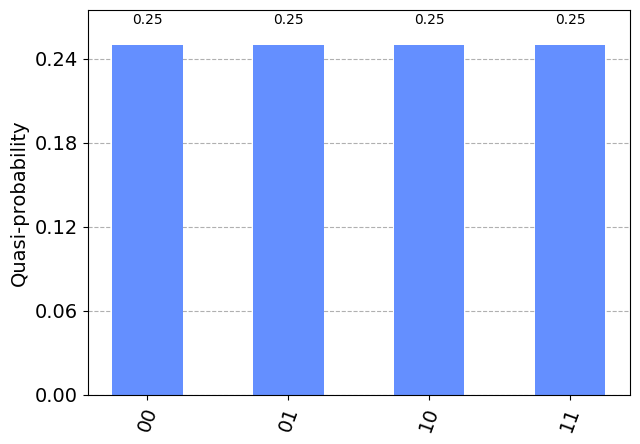

In [27]:
probs = Statevector(sv).probabilities_dict()
print(probs)
plot_histogram(probs)

### Amplificación de la amplitud

* Queremos amplificar las probabilidades del estado deseado y reducir las del resto.

In [28]:
diffuser = QuantumCircuit(2, name='diffuser')
diffuser.h([0, 1])
diffuser.z([0, 1])
diffuser.cz(0, 1)
diffuser.h([0, 1])
diffuser.to_gate()

Instruction(name='diffuser', num_qubits=2, num_clbits=0, params=[])

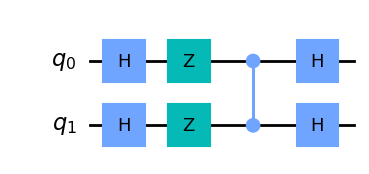

In [29]:
diffuser.draw(output='mpl')

<div>
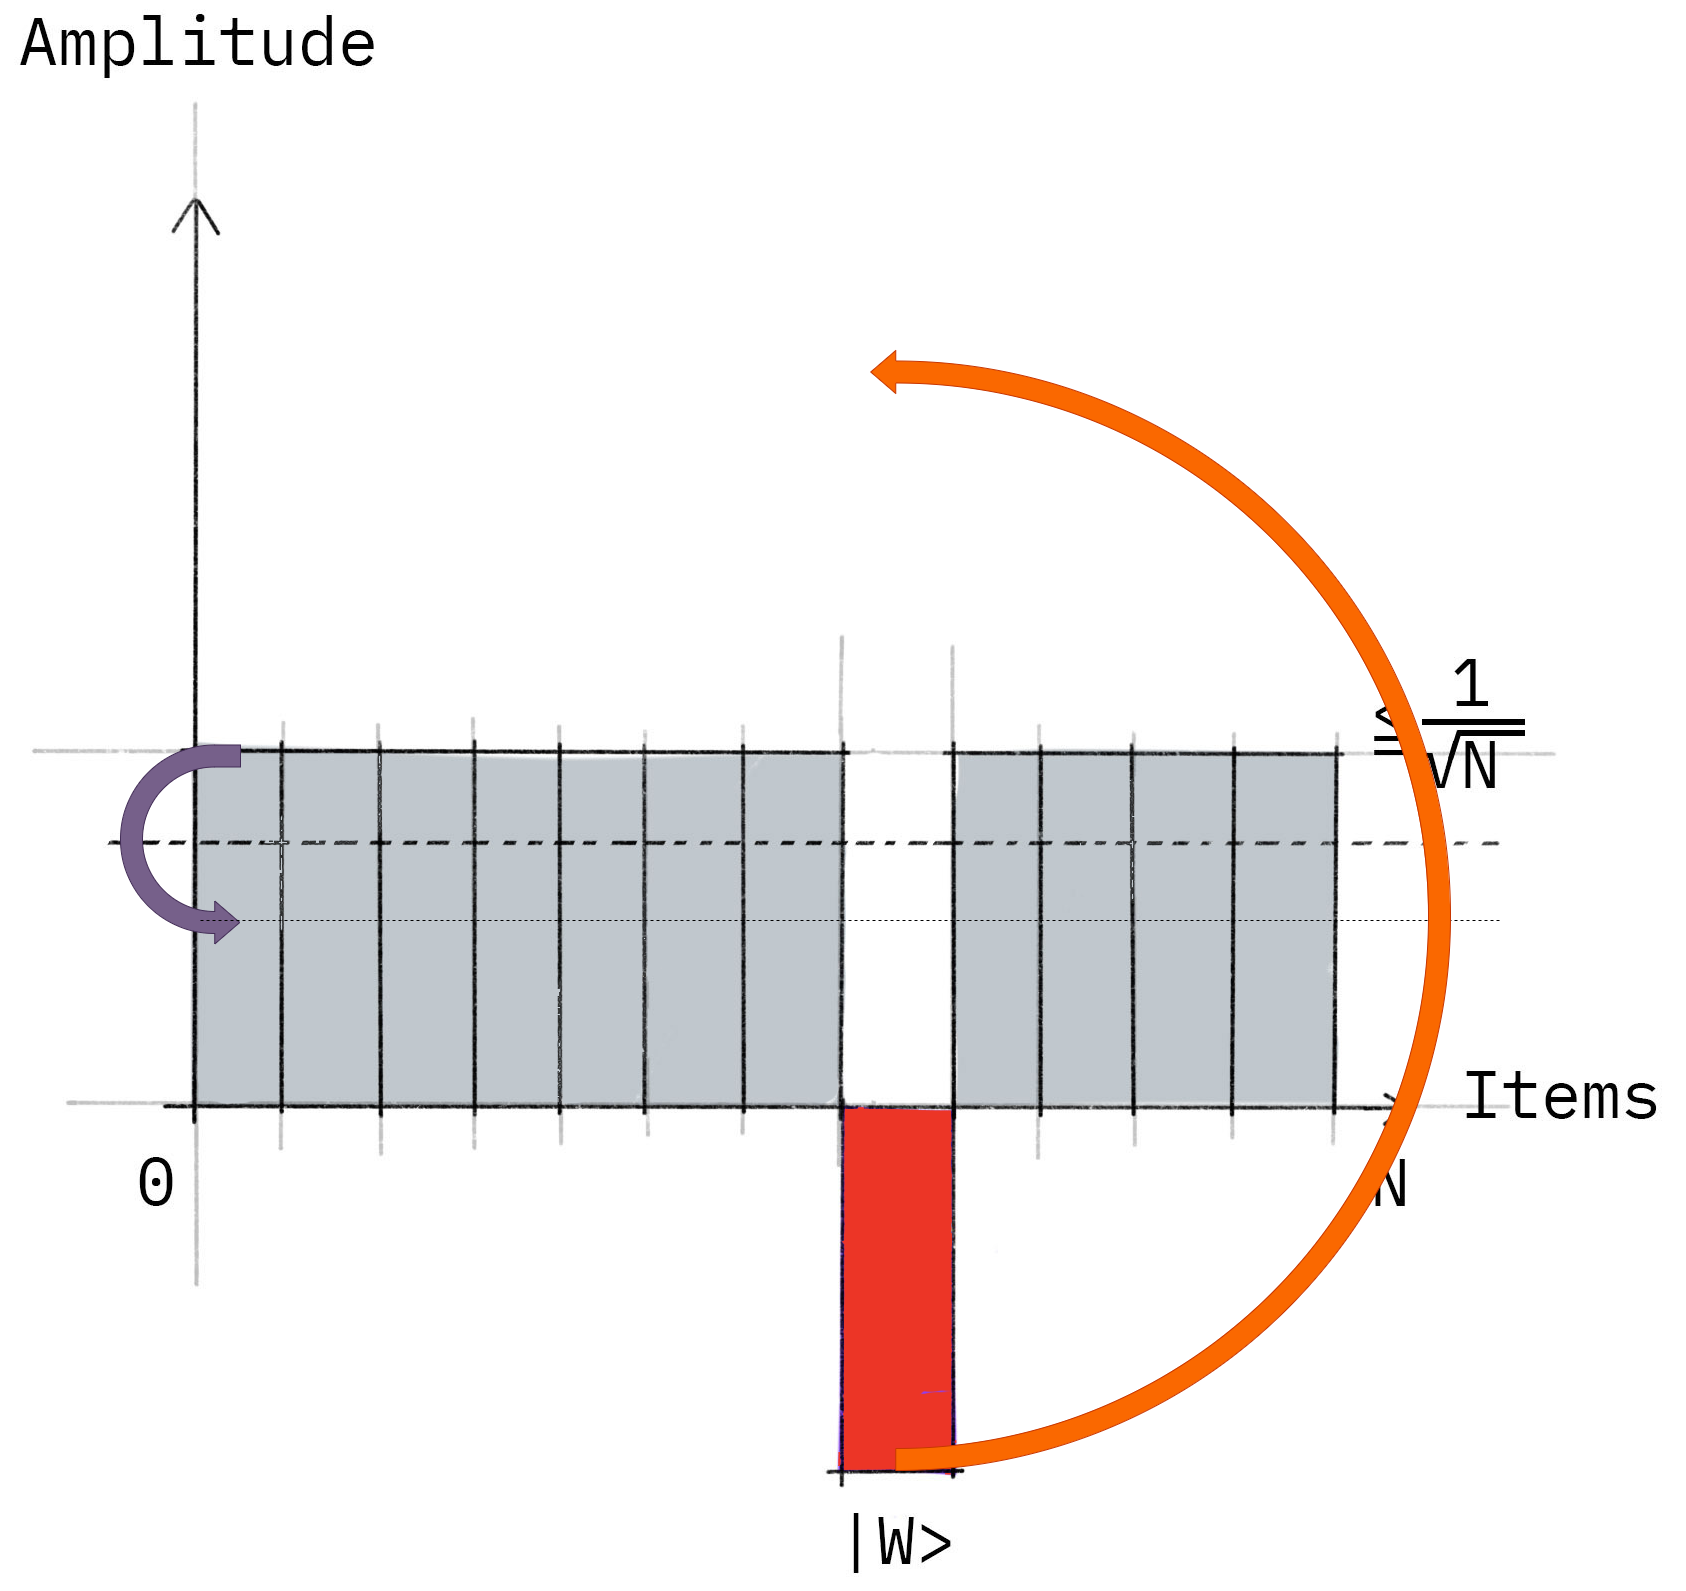
</div>

<div>
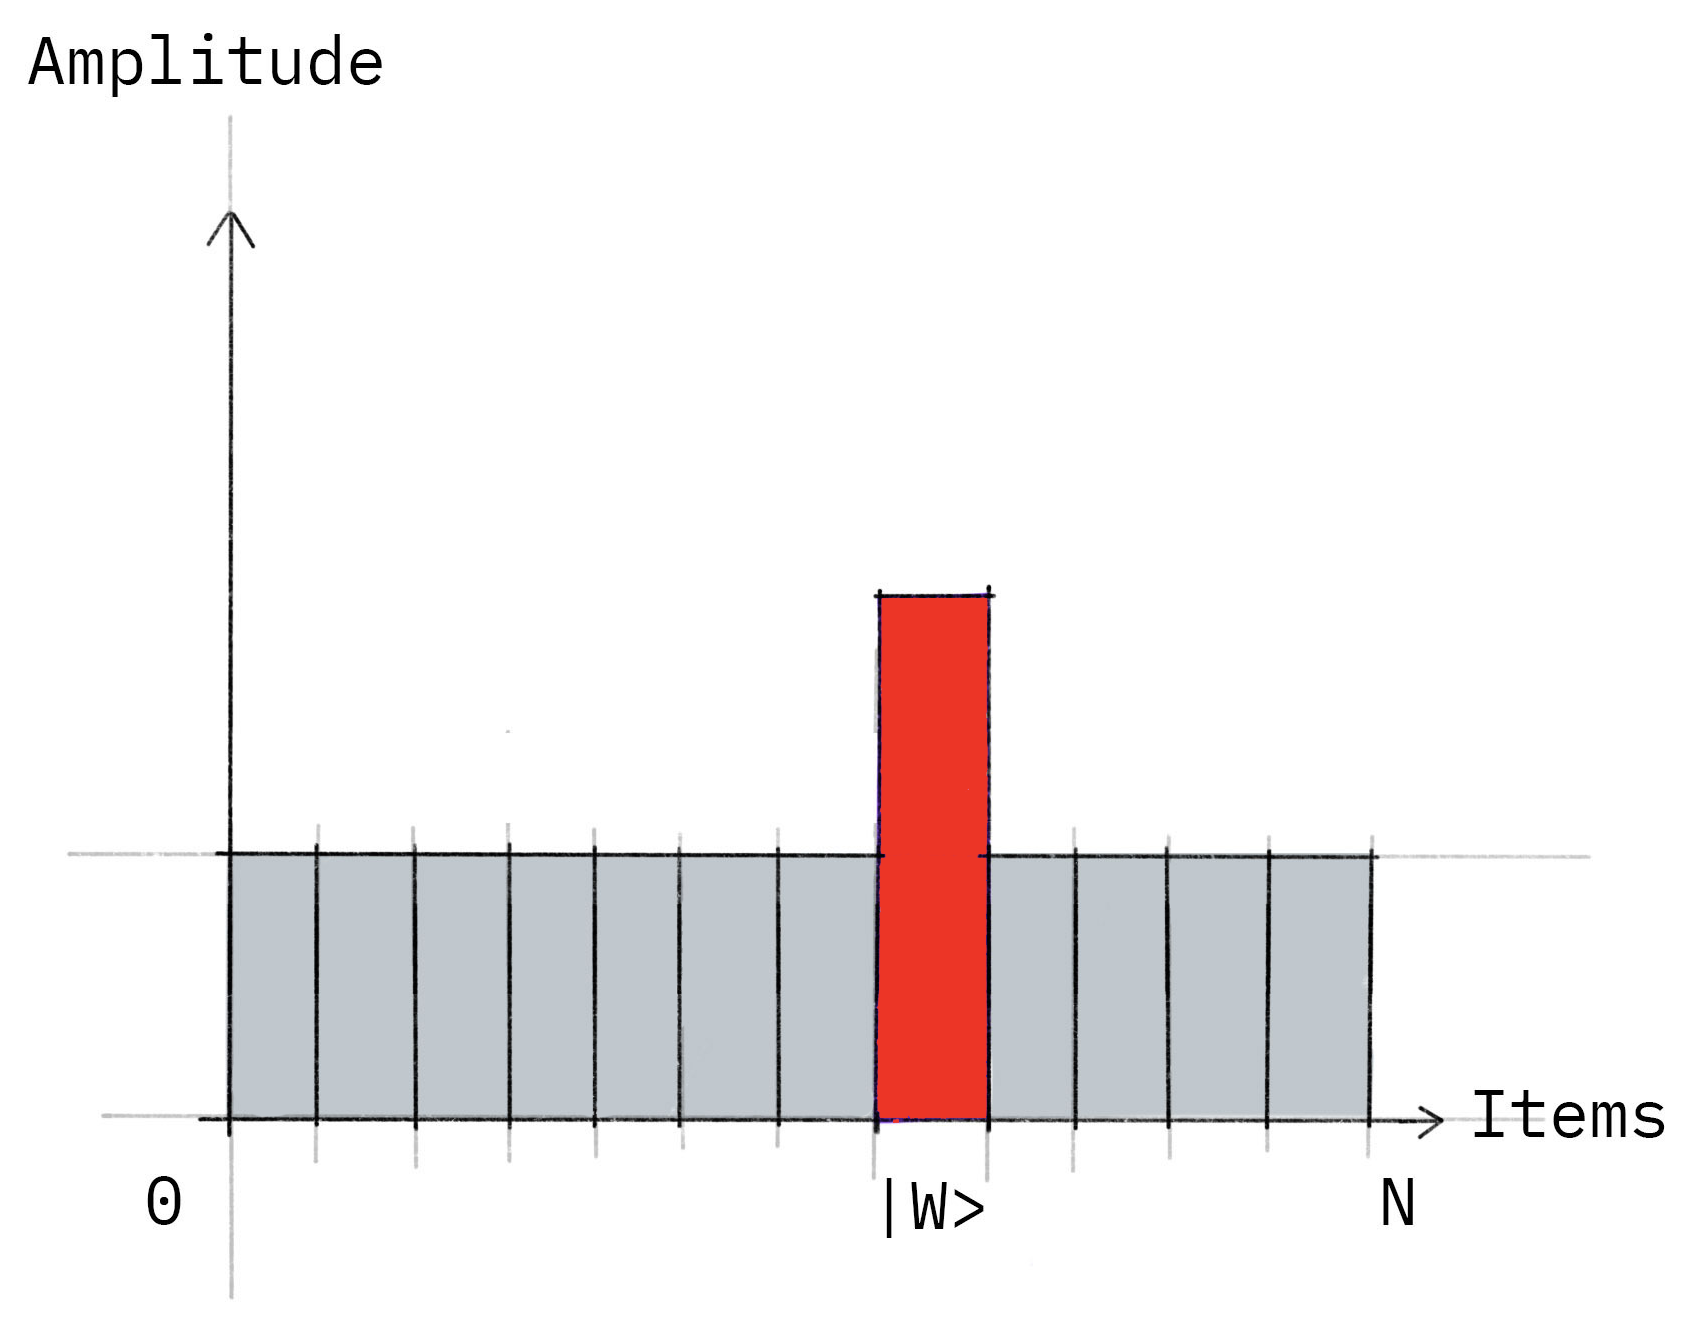
</div>

In [30]:
backend = Aer.get_backend('aer_simulator')
grover_circ = QuantumCircuit(2, 2)
grover_circ.h([0, 1])
grover_circ.append(oracle, [0, 1])
grover_circ.append(diffuser, [0, 1])
grover_circ.measure([0, 1], [0, 1])

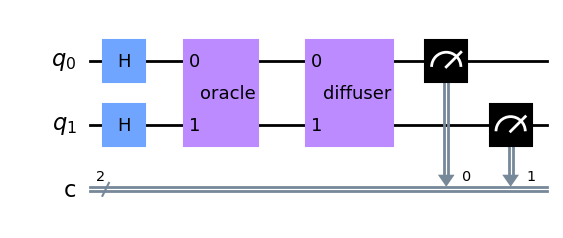

In [31]:
grover_circ.draw(output='mpl')

In [32]:
job = execute(grover_circ, backend, shots=1)
result = job.result()
counts = result.get_counts()

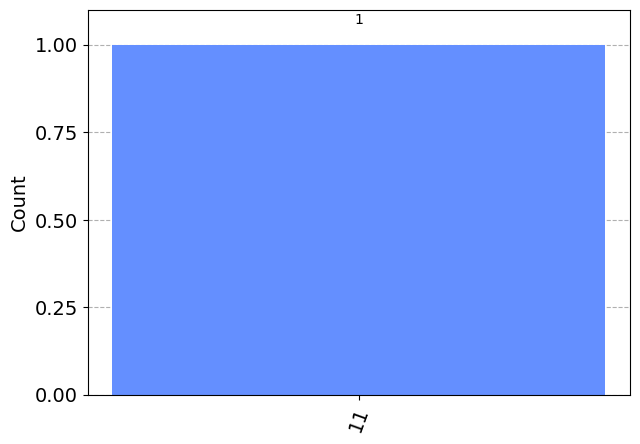

In [33]:
plot_histogram(counts)

* En este ejemplo hemos hecho una llamada al Oráculo.
* La complejidad general del algoritmo de Grover es de $O(\sqrt{N})$

<div>
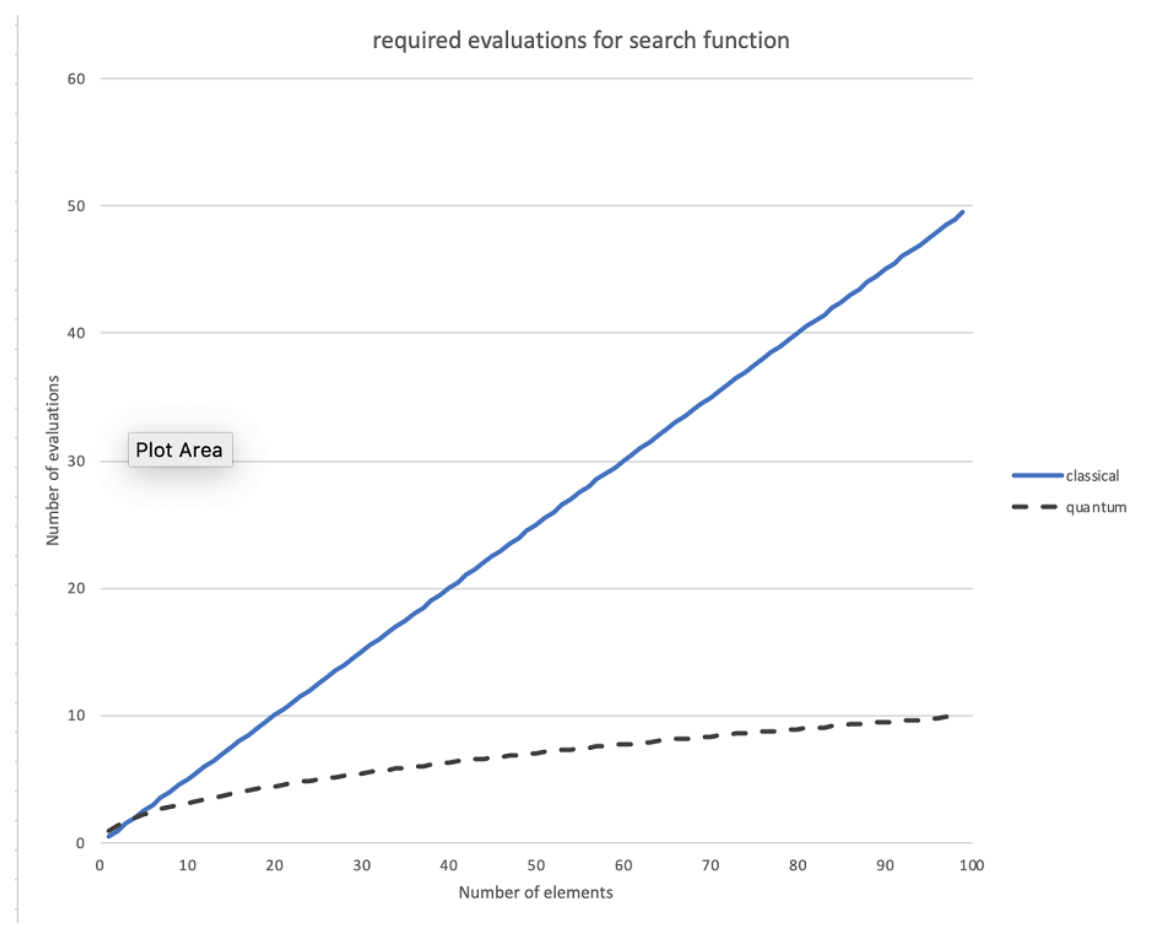
</div>

Algoritmo en el IBM Quantum Composer:
* https://quantum-computing.ibm.com/composer/files/ec13fe02142eece2d3b9ee3b96c25f686b8ac3891d58f19ffc4cb91fb085d97b

Algoritmo para 5 qubits en Quirk:
* https://algassert.com/quirk#circuit={%22cols%22:[[%22X%22,%22X%22,%22X%22,%22X%22,%22X%22],[%22H%22,%22H%22,%22H%22,%22H%22,%22H%22],[%22Chance5%22],[%22~vn6c%22],[%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22X%22],[%22Chance5%22],[%22~vn6c%22],[%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22X%22],[%22Chance5%22],[%22~vn6c%22],[%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22X%22],[%22Chance5%22],[%22~vn6c%22],[%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22X%22],[%22Chance5%22]],%22gates%22:[{%22id%22:%22~vn6c%22,%22name%22:%22Oracle%22,%22circuit%22:{%22cols%22:[[%22Z%22,%22%E2%80%A2%22,%22%E2%97%A6%22,%22%E2%80%A2%22,%22%E2%80%A2%22]]}}]}

Referencias:
* https://www.youtube.com/watch?v=0RPFWZj7Jm0
* https://quantum-computing.ibm.com/lab/docs/iqx/guide/grovers-algorithm